        Robert Fonti       3/22/18

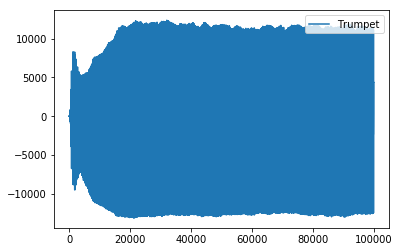

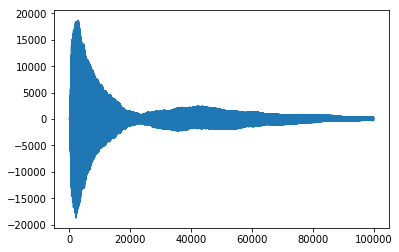

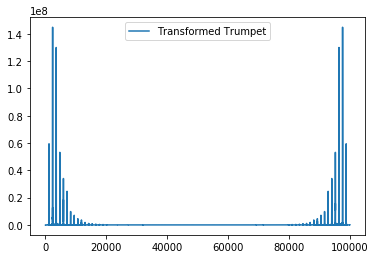

Zooming in to identify first peak


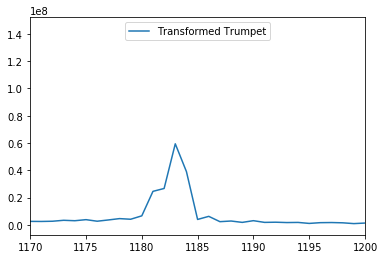

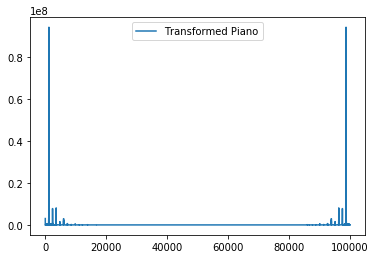

Zooming in to identify first peak


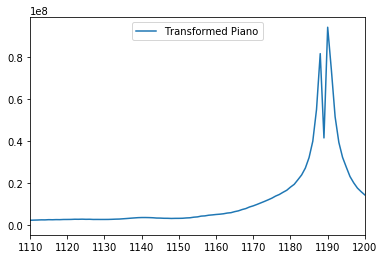

By examining the plots of the transformed waveforms, 
one can conclude that the tone output by the piano is much more pure 
than the one output by the trumpet.  This is seen by noting that the peak width 
of the Fourier transformed waveform is much narrower for the piano than the trumpet. 
 This indicates that the note played by the piano consists of fewer waves (tones) than the 
note played by the trumpet. 

Trumpet first peak estimate: 1182.5
Corresponding Note: 37.293868921775896 Hz
Note: D 

Piano first peak estimate: 1190
Corresponding Note: 37.05882352941177 Hz
Note: D 



In [2]:
#1 Instruments - Finding the dominant frequency in a note using Fourier transforms.

import numpy as np
import pylab as plt

trumpet = np.loadtxt("trumpet.txt")
piano = np.loadtxt("piano.txt")

plt.plot(trumpet,label = "Trumpet")
plt.legend(loc = 1)
plt.show()
plt.plot(piano,label = "Piano")
plt.show()

transformedTrump = np.fft.fft(trumpet)
transformedPiano = np.fft.fft(piano)

plt.plot(abs(transformedTrump),label = "Transformed Trumpet")
plt.legend(loc = 9)
plt.show()

print("Zooming in to identify first peak")
plt.plot(abs(transformedTrump),label = "Transformed Trumpet")
plt.legend(loc = 9)
plt.xlim(1170,1200)
plt.show()

plt.plot(abs(transformedPiano),label = "Transformed Piano")
plt.legend(loc = 9)
plt.show()


print("Zooming in to identify first peak")
plt.plot(abs(transformedPiano),label = "Transformed Piano")
plt.legend(loc = 9)
plt.xlim(1110,1200)
#plt.ylim(6800000,60326974.)
plt.show()

print("By examining the plots of the transformed waveforms, \n"
"one can conclude that the tone output by the piano is much more pure \n"
"than the one output by the trumpet.  This is seen by noting that the peak width \n"
"of the Fourier transformed waveform is much narrower for the piano than the trumpet. \n "
"This indicates that the note played by the piano consists of fewer waves (tones) than the \n"
"note played by the trumpet. \n")

SAMPLING_CONST = 44100
print("Trumpet first peak estimate: 1182.5")
print("Corresponding Note:",SAMPLING_CONST/1182.5,"Hz")
print("Note: D \n")
print("Piano first peak estimate: 1190")
print("Corresponding Note:",SAMPLING_CONST/1190,"Hz")
print("Note: D \n")


51.300000000000004


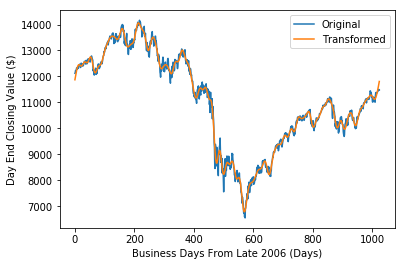

When we set some Fourier coefficients to zero 
we miss some of the more jittery behavior of the function. 
The resulting curve is smoother and fits the data well, but it 
does not catch some of the more sudden changes. Result -> Smoothing 

10.26


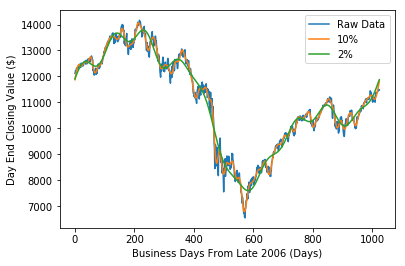

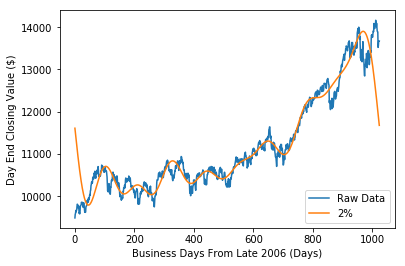

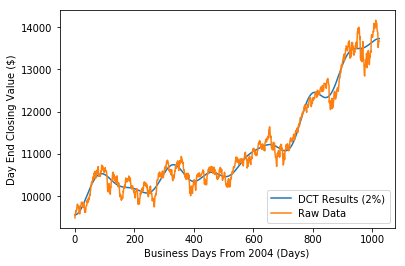

In [2]:
#2 The Dow - Finding a smoothing curve to fit the Dow Jones Index

import dcst as dcst

dow = np.loadtxt("dow.txt")
DFTcoefficients = np.fft.rfft(dow)
print(.10*len(DFTcoefficients))

for i in range(51,len(DFTcoefficients)):
    DFTcoefficients[i] = 0

transformedDow = np.fft.irfft(DFTcoefficients)
plt.plot(dow,label = "Original")
plt.plot(transformedDow,label = "Transformed")
plt.legend(loc = 1)
plt.xlabel("Business Days From Late 2006 (Days)")
plt.ylabel("Day End Closing Value ($)")
plt.show()

print("When we set some Fourier coefficients to zero \n"
     "we miss some of the more jittery behavior of the function. \n"
     "The resulting curve is smoother and fits the data well, but it \n"
     "does not catch some of the more sudden changes. Result -> Smoothing \n")

twoPercent = .02 * len(DFTcoefficients)
print(twoPercent)
for i in range(11,len(DFTcoefficients)):
    DFTcoefficients[i] = 0
twoPercentOrig = np.fft.irfft(DFTcoefficients)
plt.plot(dow,label = "Raw Data")
plt.plot(transformedDow,label = "10%")
plt.plot(twoPercentOrig,label = "2%")
plt.legend(loc = 1)
plt.xlabel("Business Days From Late 2006 (Days)")
plt.ylabel("Day End Closing Value ($)")
plt.show()


def CompareFourier(filename):
    Original = np.loadtxt(filename)
    FourierCoefficients = np.fft.rfft(Original)
    twoPercent = .02 * len(DFTcoefficients)

    for i in range(round(twoPercent),len(FourierCoefficients)):
        FourierCoefficients[i] = 0
    
    twoPercentOrig = np.fft.irfft(FourierCoefficients)
    
    plt.plot(Original,label = "Raw Data")
    plt.plot(twoPercentOrig,label = "2%")
    plt.legend(loc = 4)
    plt.xlabel("Business Days From Late 2006 (Days)")
    plt.ylabel("Day End Closing Value ($)")
    plt.show()
    
    return

CompareFourier("dow2.txt")

dow2 = np.loadtxt("dow2.txt")
cosCoefficients = dcst.dct(dow2)
twoPercent = .02*len(cosCoefficients)

for i in range(round(twoPercent),len(cosCoefficients)):
    cosCoefficients[i] = 0

invertedCos = dcst.idct(cosCoefficients)

plt.plot(invertedCos,label = "DCT Results (2%)")
plt.plot(dow2,label = "Raw Data")
plt.xlabel("Business Days From 2004 (Days)")
plt.ylabel("Day End Closing Value ($)")
plt.legend(loc =4)
plt.show()
    


In [4]:
#3 Image Compression

house = np.loadtxt("house.txt")

house

array([[0.9647, 0.9608, 0.9608, ..., 0.9647, 0.9608, 0.9647],
       [0.9686, 0.9686, 0.9686, ..., 0.9569, 0.9569, 0.9608],
       [0.9686, 0.9725, 0.9725, ..., 0.9529, 0.9529, 0.9569],
       ...,
       [0.3725, 0.3686, 0.3647, ..., 0.1647, 0.1529, 0.1529],
       [0.3922, 0.3843, 0.3765, ..., 0.1725, 0.1765, 0.1765],
       [0.3961, 0.3843, 0.3725, ..., 0.2078, 0.2353, 0.2392]])

0
462949
619809
740092
864016
944574
992157
1024730
1035860
1043948
Part D:
Elements set to zero: 462949.0
Compression Ratio: 0.44150257110595703 

Testing several more compression ratios:

Compression Ratio: 0.44150257110595703


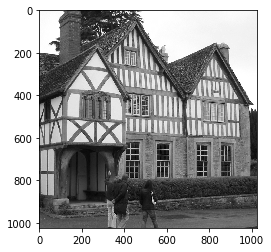

Compression Ratio: 0.5910959243774414


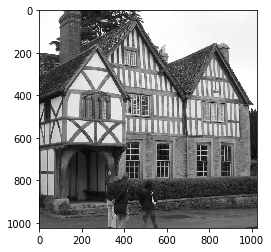

Compression Ratio: 0.7058067321777344


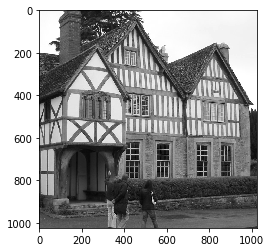

Compression Ratio: 0.8239898681640625


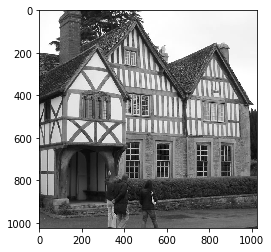

Compression Ratio: 0.9772586822509766


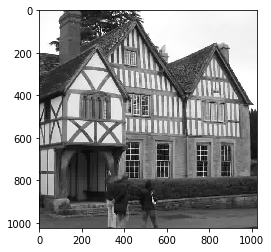

Compression Ratio: 0.9878730773925781


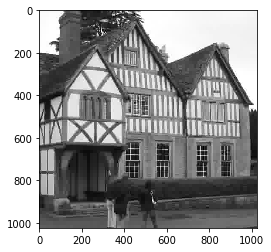

Compression Ratio: 0.9955863952636719


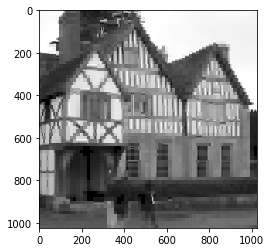

Original...No Compression 



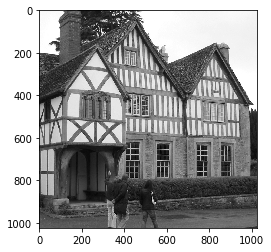

A compression of over 99% is possible before the image quality 
begins to appear significantly reduced. It is quite remarkable that 
the image can be compressed so much; it is clear why fast fourier transforms 
are so valuable in the digital age.


In [4]:
compressedHouse = np.zeros([len(house[0]),len(house[1])])

for i in range(0,len(compressedHouse[0]),16):  #taking steps of 16
    for j in range(0,len(compressedHouse[1]),16):
        #break matrix up into 16*16 chunks
        compressedHouse[i:i+16,j:j+16] = dcst.dct2(house[i:i+16,j:j+16])

def CompressHouse(minFourier):
    elementsSetToZero = 0
    for i in range(len(compressedHouse[0])):
        for j in range(len(compressedHouse[1])):
            if abs(compressedHouse[i,j])< minFourier:
                compressedHouse[i,j] = 0
                elementsSetToZero += 1
    print(elementsSetToZero)
    compressionRatio = elementsSetToZero/house.size
    elementsSetToZero = 0

    decompressedHouse = np.zeros([len(house[0]),len(house[1])])

    for i in range(0,len(compressedHouse[0]),16):  #taking steps of 16
        for j in range(0,len(compressedHouse[1]),16):
            #break matrix up into 16*16 chunks
            decompressedHouse[i:i+16,j:j+16] = dcst.idct2(compressedHouse[i:i+16,j:j+16])
        
    return decompressedHouse,compressionRatio

original,origRatio = CompressHouse(0)
Compressed1,ratio1 = CompressHouse(.1)
Compressed2,ratio2 = CompressHouse(.25)
Compressed3,ratio3 = CompressHouse(.5)
Compressed4,ratio4 = CompressHouse(1)
Compressed6,ratio6 = CompressHouse(2)
Compressed8,ratio8 = CompressHouse(4)
Compressed10,ratio10 = CompressHouse(10)
Compressed11,ratio11 = CompressHouse(20)
Compressed12,ratio12 = CompressHouse(90)


print("Part D:")
print("Elements set to zero:",ratio1*house.size)
print("Compression Ratio:",ratio1,"\n")
print("Testing several more compression ratios:\n")


print("Compression Ratio:",ratio1)
plt.imshow(Compressed1,vmin = 0,vmax = 1)
plt.gray()
plt.show()

print("Compression Ratio:",ratio2)
plt.imshow(Compressed2,vmin = 0,vmax = 1)
plt.gray()
plt.show()

print("Compression Ratio:",ratio3)
plt.imshow(Compressed3,vmin = 0,vmax = 1)
plt.gray()
plt.show()

print("Compression Ratio:",ratio4)
plt.imshow(Compressed4,vmin = 0,vmax = 1)
plt.gray()
plt.show()

print("Compression Ratio:",ratio10)
plt.imshow(Compressed10,vmin = 0,vmax = 1)
plt.gray()
plt.show()

print("Compression Ratio:",ratio11)
plt.imshow(Compressed11,vmin = 0,vmax = 1)
plt.gray()
plt.show()

print("Compression Ratio:",ratio12)
plt.imshow(Compressed12,vmin = 0,vmax = 1)
plt.gray()
plt.show()

print("Original...No Compression \n")
plt.imshow(original,vmin=0,vmax = 1)
plt.gray()
plt.show()


print("A compression of over 99% is possible before the image quality \n"
      "begins to appear significantly reduced. It is quite remarkable that \n"
      "the image can be compressed so much; it is clear why fast fourier transforms \n"
      "are so valuable in the digital age."
     )


RC = .01


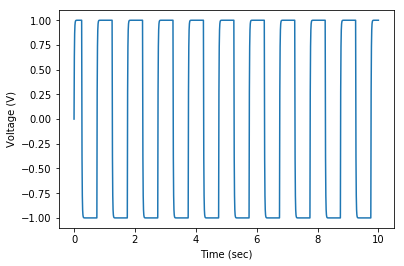

RC = .1


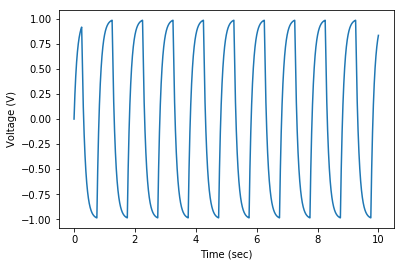

RC = 1


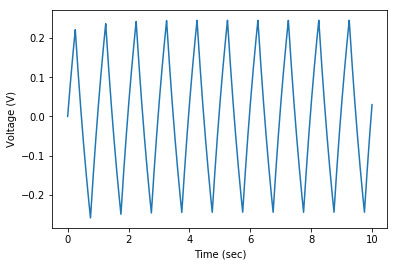

The capacitor in the circuit is building up charge over time before 
the capacitor discharges and the voltage drops again.  The low pass filter 
will act to filter out high frequency signals as they are directed towards 
the capacitor. The smaller RC is, the longer the circuit holds on to its 
max voltag. This explains why the peaks for RC = 1 are much sharper than those 
for RC = .01.


In [5]:
a = 0
b = 10
N = 10000
h = (b-a)/N

#RC = .1

def f(Vout,t,RC):
    if round(2*t)%2 == 0:
        return 1/(RC)*(1-Vout)
    if round(2*t)%2 == 1:
        return 1/(RC)*(-1-Vout)
    
tpoints = np.arange(a,b,h)
#xpoints = []
Vout = 0  #Initial Condition

tempTpoints = np.arange(a,b,h)
tempXpoints = []
tempVout = 0

def RungeKutta(RC):
    #tpoints = np.arange(a,b,h)
    xpoints = []
    Vout = 0
    for t in tpoints:    
        xpoints.append(Vout)
        k1 = h*f(Vout,t,RC)
        k2 = h*f(Vout+.5*k1,t+.5*h,RC)
        k3 = h*f(Vout+.5*k2,t+.5*h,RC)
        k4 = h*f(Vout+k3,t+h,RC)
    
        Vout += (k1+2*k2+2*k3+k4)/6
        
    return xpoints
    
#Eulers for comparison
#for t in tempTpoints:
    #tempXpoints.append(tempVout)
    #tempVout += h*f(tempVout,t)

#print(xpoints)
    
#plt.plot(tpoints,xpoints,label = "Vout")
#plt.xlabel("Time (sec)")
#plt.ylabel("Voltage (V)")
#plt.show()

#plt.plot(tempTpoints,tempXpoints,label = "Eulers")
#plt.xlabel("Eulers Time (sec)")
#plt.ylabel("Voltage (V)")
#plt.legend(loc = 2)


Xpts1 = RungeKutta(.01)
Xpts2 = RungeKutta(.1)
Xpts3 = RungeKutta(1)

print("RC = .01")
plt.plot(tpoints,Xpts1)
plt.xlabel("Time (sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("RC = .1")
plt.plot(tpoints,Xpts2)
plt.xlabel("Time (sec)")
plt.ylabel("Voltage (V)")
plt.show()

print("RC = 1")
plt.plot(tpoints,Xpts3)
plt.xlabel("Time (sec)")
plt.ylabel("Voltage (V)")
plt.show()


print("The capacitor in the circuit is building up charge over time before \n"
     "the capacitor discharges and the voltage drops again.  The low pass filter \n"
      "will act to filter out high frequency signals as they are directed towards \n"
      "the capacitor. The smaller RC is, the longer the circuit holds on to its \n"
      "max voltage. This explains why the peaks for RC = 1 are much sharper than those \n"
      "for RC = .01.")


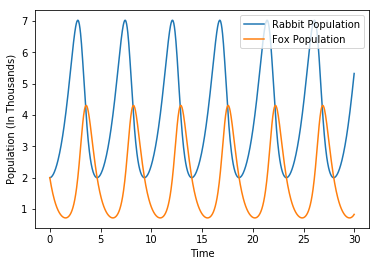

The plot of the fox and rabbit populations makes physical sense. 
One can see that as the rabbit population increases, the fox 
population also increases, as the foxes now have more food available 
to them.  With an increasing fox population, the rabbit population begins 
to decline because larger numbers are being hunted to sustain the increased 
fox population. The rabbit population then begins to drop again, and after a 
 short amound of time the fox population follows suit and decreases as the foxes 
begin to starve.  With a decreased fox population the rabbits thrive and their 
numbers begin to rise again.  This process continues, which describes the periodic 
behavior of the fox and rabbit populations.


In [6]:
#5 The Lotka-Volterra Equations - modeling fox and rabbit populations

alpha = 1
gamma = .5
beta = .5
delta = 2

a = 0
b = 30
N = 1000
h = (b-a)/N
tpts = np.arange(a,b,h)
xpts = []

r = np.array([2.0,2.0],float) #array will make arithmetic easy

def g(r,t):
    x = r[0]
    y = r[1]
    
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    
    return np.array([fx,fy],float)

xpts = []
ypts = []
Vout = 0
for t in tpts:    
    xpts.append(r[0])
    ypts.append(r[1])
    k1 = h*g(r,t)
    k2 = h*g(r+.5*k1,t+.5*h)
    k3 = h*g(r+.5*k2,t+.5*h)
    k4 = h*g(r+k3,t+h)
    
    r += (k1+2*k2+2*k3+k4)/6


plt.plot(tpts,xpts,label = "Rabbit Population")
plt.plot(tpts,ypts,label = "Fox Population")
plt.xlabel("Time")
plt.ylabel("Population (In Thousands)")
plt.legend(loc = 1)
plt.show()

print("The plot of the fox and rabbit populations makes physical sense. \n"
     "One can see that as the rabbit population increases, the fox \n"
     "population also increases, as the foxes now have more food available \n"
     "to them.  With an increasing fox population, the rabbit population begins \n"
     "to decline because larger numbers are being hunted to sustain the increased \n"
      "fox population. The rabbit population then begins to drop again, and after a \n "
     "short amound of time the fox population follows suit and decreases as the foxes \n"
     "begin to starve.  With a decreased fox population the rabbits thrive and their \n"
     "numbers begin to rise again.  This process continues, which describes the periodic \n"
     "behavior of the fox and rabbit populations.")